In [16]:
import numpy as np
import pandas as pd

from typing import List, Tuple
import matplotlib.pyplot as plt
import math

from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier


# Fix the random seed for reproducibility
# !! Important !! : do not change this
# hw1_seed = 1234
# np.random.seed(hw1_seed)  
# pd.options.mode.chained_assignment = None 

In [17]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
diabetes_130_us_hospitals_for_years_1999_2008 = fetch_ucirepo(id=296) 
  
# data (as pandas dataframes) 
X = diabetes_130_us_hospitals_for_years_1999_2008.data.features 
y = diabetes_130_us_hospitals_for_years_1999_2008.data.targets 
  
# metadata 
print(diabetes_130_us_hospitals_for_years_1999_2008.metadata) 
  
# variable information 
print(diabetes_130_us_hospitals_for_years_1999_2008.variables) 

## testing splits ##

## 20 percent set aside
X_temp, X_te, y_temp, y_te = train_test_split(X, y, 
                                    test_size=0.20, random_state=1234, shuffle=True)

## that 75/25 split for the end 
X_tr, X_val, y_tr, y_val = train_test_split(X_temp, y_temp, 
                                    test_size=0.25, random_state=1234, shuffle=True)


X_tr


c:\Users\Varshini\.anaconda\envs\cs178\lib\site-packages\ucimlrepo\fetch.py:97: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


{'uci_id': 296, 'name': 'Diabetes 130-US Hospitals for Years 1999-2008', 'repository_url': 'https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008', 'data_url': 'https://archive.ics.uci.edu/static/public/296/data.csv', 'abstract': 'The dataset represents ten years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. Each row concerns hospital records of patients diagnosed with diabetes, who underwent laboratory, medications, and stayed up to 14 days. The goal is to determine the early readmission of the patient within 30 days of discharge.\nThe problem is important for the following reasons. Despite high-quality evidence showing improved clinical outcomes for diabetic patients who receive various preventive and therapeutic interventions, many patients do not receive them. This can be partially attributed to arbitrary diabetes management in hospital environments, which fail to attend to glycemic control. Failure to provide pro

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
48004,AfricanAmerican,Female,[60-70),NaN,1,1,7,2,NaN,NaN,...,No,No,Steady,No,No,No,No,No,Ch,Yes
66310,Caucasian,Male,[70-80),NaN,1,1,7,4,MC,NaN,...,No,No,No,No,No,No,No,No,No,Yes
60905,Caucasian,Female,[70-80),NaN,1,1,7,3,HM,NaN,...,No,No,Steady,No,No,No,No,No,Ch,Yes
1873,Caucasian,Female,[70-80),NaN,3,1,1,2,NaN,Surgery-General,...,No,No,No,No,No,No,No,No,No,No
38252,Caucasian,Female,[50-60),NaN,1,6,7,3,MD,InternalMedicine,...,No,No,No,No,No,No,No,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56803,AfricanAmerican,Male,[20-30),NaN,1,1,7,11,DM,NaN,...,No,No,Down,No,No,No,No,No,Ch,Yes
60682,Caucasian,Male,[70-80),NaN,1,6,1,7,NaN,Emergency/Trauma,...,No,No,Down,No,No,No,No,No,Ch,Yes
4596,Caucasian,Female,[70-80),NaN,1,3,7,4,NaN,Orthopedics,...,No,No,No,No,No,No,No,No,No,Yes
19756,AfricanAmerican,Male,[40-50),NaN,1,1,7,2,NaN,InternalMedicine,...,No,No,No,No,No,No,No,No,No,Yes


In [47]:
#rebecca 
#print(X_tr.dtypes)

def split_by_type(X):
    X_num = X.select_dtypes(include=['int64'])
    X_object = X.select_dtypes(include=['object'])
    return X_num, X_object

X_num, X_object = split_by_type(X_tr)
y_num, y_object = split_by_type(y_tr)
#print(X_num)
#print(X_object)

def summary_num(X):
    summary_table = []
    def get_mean(subset, col):
        return np.nanmean(subset[col], axis=0)
    def get_std(subset, col):
        return np.nanstd(subset[col], axis=0)
    def get_median(subset, col):
        return np.nanmedian(subset[col], axis=0)
    def get_var(subset, col):
        return np.nanvar(subset[col], axis=0)
    total_features = X.columns
    for col in total_features:
        summary_table.append([get_mean(X, col), get_std(X, col), get_median(X, col), get_var(X, col)])
    summary_table = np.to_array(summary_table)
    return summary_table

#print(summary_num(X_num))
    
    


0.43544768175043813
0.4336952783373459


[Text(0.5, 0.8333333333333334, 'x[9] <= -0.11\ngini = 0.575\nsamples = 61059\nvalue = [6832, 21379, 32848]'),
 Text(0.25, 0.5, 'x[10] <= -0.995\ngini = 0.525\nsamples = 40455\nvalue = [3427, 12189, 24839]'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'gini = 0.45\nsamples = 9666\nvalue = [614.0, 2286.0, 6766.0]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.544\nsamples = 30789\nvalue = [2813, 9903, 18073]'),
 Text(0.75, 0.5, 'x[9] <= 0.675\ngini = 0.623\nsamples = 20604\nvalue = [3405, 9190, 8009]'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'gini = 0.603\nsamples = 11796\nvalue = [1518, 4918, 5360]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.628\nsamples = 8808\nvalue = [1887.0, 4272.0, 2649.0]')]

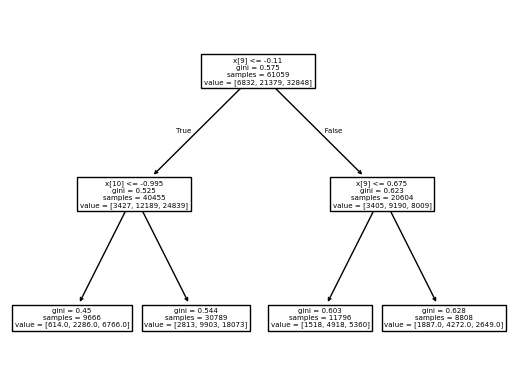

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
#3 order ; one hot encoding <- splits categorical into more features 1/0 if yes/no and Standard scaler for scaling data


# replacing ? with NAN and replacing NAN with the mode
X = X.replace("?", np.nan)
y = y.replace("?", np.nan)

for col in X.columns:
    X[col] = X[col].fillna(X[col].mode()[0])


categorical = X_tr.select_dtypes(include=['object']).columns.tolist()
numerical = X_tr.select_dtypes(include=['int64']).columns.tolist()

encoder = OneHotEncoder(handle_unknown='ignore')
scaler = StandardScaler()

##### COL TRANSFORMER NUM AND CAT COLUMNS <- joins them tgt and applies scaler and encoder
preproc = ColumnTransformer(transformers = [('num', scaler, numerical), ('cat', encoder, categorical)])
X_tr_2 = preproc.fit_transform(X_tr)
X_val_2 = preproc.transform(X_val)
X_te_2 = preproc.transform(X_te)

hw1_seed = 1234
clf = DecisionTreeClassifier(max_depth=2, random_state=hw1_seed)
clf.fit(X_tr_2, y_tr)

clf_err_tr = 1-clf.score(X_tr_2, y_tr)
clf_err_val = 1-clf.score(X_val_2, y_val)

print(clf_err_tr)
print(clf_err_val)

plot_tree(clf)

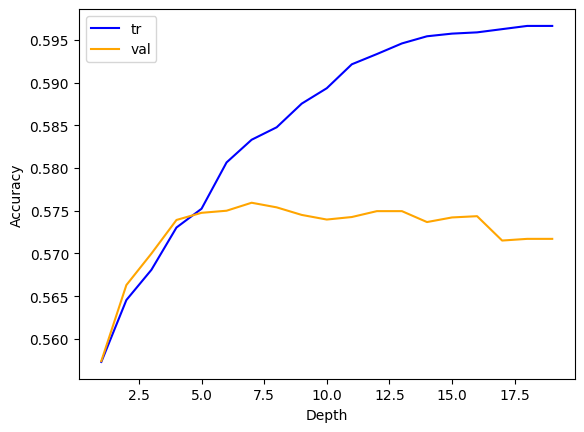

In [67]:
# decision tree w/ different max_depths
training_curve = []
testing_curve = []
max_depths = np.arange(1,20,1)
for depth in max_depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=hw1_seed, min_samples_leaf = 95)
    clf.fit(X_tr_2, y_tr)

    clf_acc_tr = clf.score(X_tr_2, y_tr)
    clf_acc_val = clf.score(X_val_2, y_val)
    training_curve.append(clf_acc_tr)
    testing_curve.append(clf_acc_val)
    
plt.plot(max_depths, training_curve, label='tr', color = 'blue')
plt.plot(max_depths, testing_curve, label='val', color = 'orange')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.legend()

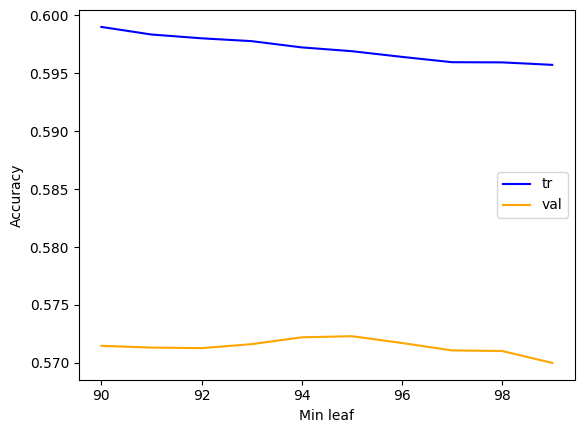

In [63]:
training_curve = []
testing_curve = []
min_leaf_samples = np.arange(90,100,1)
for min_leaf in min_leaf_samples:
    clf = DecisionTreeClassifier(criterion='gini', min_samples_leaf=min_leaf, random_state=hw1_seed)
    clf.fit(X_tr_2, y_tr)

    clf_acc_tr = clf.score(X_tr_2, y_tr)
    clf_acc_val = clf.score(X_val_2, y_val)
    training_curve.append(clf_acc_tr)
    testing_curve.append(clf_acc_val)
    
plt.plot(min_leaf_samples, training_curve, label='tr', color = 'blue')
plt.plot(min_leaf_samples, testing_curve, label='val', color = 'orange')
plt.xlabel('Min leaf')
plt.ylabel('Accuracy')
plt.legend()

1


c:\Users\16264\miniconda3\envs\cs178\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


10


c:\Users\16264\miniconda3\envs\cs178\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


25


c:\Users\16264\miniconda3\envs\cs178\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


50


c:\Users\16264\miniconda3\envs\cs178\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


75


c:\Users\16264\miniconda3\envs\cs178\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


100


c:\Users\16264\miniconda3\envs\cs178\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


200


c:\Users\16264\miniconda3\envs\cs178\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


350


c:\Users\16264\miniconda3\envs\cs178\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


500


c:\Users\16264\miniconda3\envs\cs178\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


1000


c:\Users\16264\miniconda3\envs\cs178\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


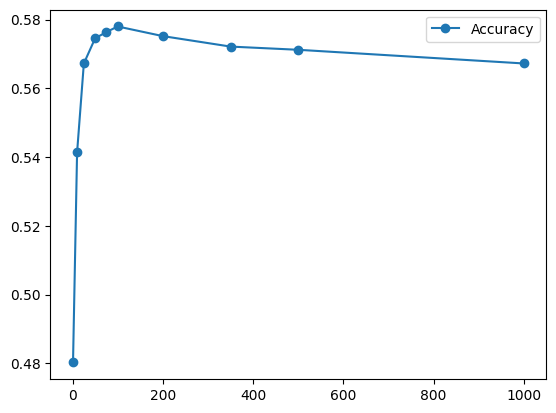

BEST K FOUND: 100 0.578


In [ ]:
#amy
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import TruncatedSVD
#3 order ; one hot encoding <- splits categorical into more features 1/0 if yes/no and Standard scaler for scaling data


# replacing ? with NAN and replacing NAN with the mode
X = X.replace("?", np.nan)
y = y.replace("?", np.nan)

for col in X.columns:
    X[col] = X[col].fillna(X[col].mode()[0])


categorical = X_tr.select_dtypes(include=['object']).columns.tolist()
numerical = X_tr.select_dtypes(include=['int64']).columns.tolist()

encoder = OneHotEncoder(handle_unknown='ignore')
scaler = StandardScaler()

##### COL TRANSFORMER NUM AND CAT COLUMNS <- joins them tgt and applies scaler and encoder
preproc = ColumnTransformer(transformers = [('num', scaler, numerical), ('cat', encoder, categorical)])
X_tr_2 = preproc.fit_transform(X_tr)
X_val_2 = preproc.transform(X_val)
X_te_2 = preproc.transform(X_te)

svd = TruncatedSVD(n_components=47, random_state=1234)
X_tr_svd = svd.fit_transform(X_tr_2)
X_val_svd = svd.transform(X_val_2)
X_te_svd = svd.transform(X_te_2)

accs = []

best_k = None
best_acc = 0
# errs = []
k_vals = [1, 10, 25,50,75, 100, 200, 350, 500, 1000] ## 1-50 = 7.5 mins, 1-1000+ = 11.5 mins
for i, k in enumerate(k_vals):
    print(k)
    knn = KNeighborsClassifier(n_neighbors=k)

    # knn.fit(X_tr_2, y_tr)
    # pred = knn.predict(X_val_2)

    ### SVD IMPLEMENTATION

    knn.fit(X_tr_svd, y_tr)
    pred = knn.predict(X_val_svd)
    acc = accuracy_score(y_val, pred)

    ####

    accs.append(acc)

    if acc > best_acc:
        best_acc = acc
        best_k = k
    # errs.append(1-acc)
## TODO: some of that ravel error stuff ? doesnt matter long run tho
plt.plot(k_vals, accs, marker='o', label='Accuracy')
plt.legend()
plt.show()
print("BEST K FOUND:", best_k, round(best_acc, 4))

c:\Users\16264\miniconda3\envs\cs178\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Test Accuracy with best k (100): 0.5744

Classification Report:
               precision    recall  f1-score   support

         <30       0.46      0.01      0.02      2308
         >30       0.52      0.24      0.33      7106
          NO       0.59      0.91      0.71     10940

    accuracy                           0.57     20354
   macro avg       0.52      0.39      0.35     20354
weighted avg       0.55      0.57      0.50     20354



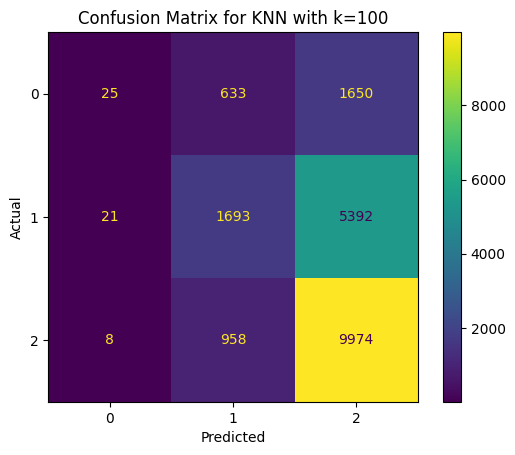

In [36]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def compute_confusion_matrix(y, y_pred):
    
    ### YOUR CODE STARTS HERE ###
    tp_labels = []
    conf_matrix = []
    for i in range(len(y)):
        tp_labels.append([y[i], y_pred[i]])
    #     conf_matrix.append([0 for j in range(len(y))])
    # print(conf_matrix)
    conf_matrix = np.zeros((10, 10), dtype=int)
    for y1, y2 in tp_labels:
        # print(y1, y2)
        # print(conf_matrix[y1][y2])
        conf_matrix[y1][y2] += 1
        
    ### YOUR CODE ENDS HERE ###
    return np.array(conf_matrix)

best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_tr_svd, y_tr)
y_pred_test = best_knn.predict(X_te_svd)

acc = accuracy_score(y_te, y_pred_test)
print("Test Accuracy with best k ({}): {:.4f}".format(best_k, acc))

conf_matrix = confusion_matrix(y_te, y_pred_test)
report = classification_report(y_te, y_pred_test)

print("\nClassification Report:\n", report)

disp = ConfusionMatrixDisplay(confusion_matrix = conf_matrix)

disp.plot()
plt.title(f'Confusion Matrix for KNN with k={best_k}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [18]:
#varsh
#logistic regression
seed = 1234
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
#3 order ; one hot encoding <- splits categorical into more features 1/0 if yes/no and Standard scaler for scaling data


# replacing ? with NAN and replacing NAN with the mode
X = X.replace("?", np.nan)
y = y.replace("?", np.nan)

for col in X.columns:
    X[col] = X[col].fillna(X[col].mode()[0])


categorical = X_tr.select_dtypes(include=['object']).columns.tolist()
numerical = X_tr.select_dtypes(include=['int64']).columns.tolist()

encoder = OneHotEncoder(handle_unknown='ignore')
scaler = StandardScaler()

##### COL TRANSFORMER NUM AND CAT COLUMNS <- joins them tgt and applies scaler and encoder
preproc = ColumnTransformer(transformers = [('num', scaler, numerical), ('cat', encoder, categorical)])
X_tr_2 = preproc.fit_transform(X_tr)
X_val_2 = preproc.transform(X_val)
X_te_2 = preproc.transform(X_te)

def logistic_classification(X, y): 
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)
    #  set the state of the random number generator so that we get the same results across runs when testing our code

    ### YOUR CODE START HERE ### 

    # Specify the logistic classifier model
    # # Please use 'l1' penality type, 'liblinear' solver and enable fit_intercept
    classifier = LogisticRegression(penalty='l1', solver='liblinear', fit_intercept=True)
    # Train a logistic regression classifier and evaluate accuracy on the training data
    print('\nTraining a model with', X_train.shape[0], 'examples.....')
    # Training 
    classifier.fit(X_train, y_train)
    
    train_predictions = classifier.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_predictions)
    print('\nTraining accuracy:',format( 100*train_accuracy , '.2f') ) 

    # Compute and print accuracy on the test data
    test_predictions = classifier.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_predictions)

    ### YOUR CODE ENDS HERE ###
    print('\nTesting accuracy:', format( 100*test_accuracy , '.2f') )

    return classifier, train_accuracy, test_accuracy


#feedforward neural network

def train_mlp_with_hyperparameters(hyper_params, X_tr_10k, y_tr_10k, X_val_10k, y_val_10k, X_te_scaled, y_te, seed) -> Tuple[float, float, float]:
    mlp = MLPClassifier(**hyper_params, shuffle=True, random_state=seed, verbose=False)
    mlp.fit(X_tr_10k, y_tr_10k)
    train_accuracy = mlp.score(X_tr_10k, y_tr_10k)
    val_accuracy = mlp.score(X_val_10k, y_val_10k)
    test_accuracy = mlp.score(X_te_scaled, y_te)
    
    print('Hyperparameters performance:')
    print(f'Training accuracy: {train_accuracy}')
    print(f'Validation accuracy: {val_accuracy}')
    print(f'Test accuracy: {test_accuracy}')
    return train_accuracy, val_accuracy, test_accuracy

best_hyperparams = {'hidden_layer_sizes': (100,),
                    'activation': 'relu', 
                    'solver': 'sgd',
                    'alpha': .1,
                    'learning_rate': 'constant',
                    'learning_rate_init': .05,
                    'max_iter': 100,
                    'n_iter_no_change': 1}

logistic_classification(X_tr_2, y_tr)
train_mlp_with_hyperparameters(best_hyperparams, X_tr_2, y_tr, X_val_2, y_val, X_te_2, y_te, seed)



Training a model with 42741 examples.....


c:\Users\Varshini\.anaconda\envs\cs178\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Training accuracy: 59.61

Testing accuracy: 57.31


c:\Users\Varshini\.anaconda\envs\cs178\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1119: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Hyperparameters performance:
Training accuracy: 0.6121128744329255
Validation accuracy: 0.5872844298137867
Test accuracy: 0.5897120959025253


(0.6121128744329255, 0.5872844298137867, 0.5897120959025253)